In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import style

W tym projekcie skupie się na Bio-różnorodności w największych parkach Stanów Zjednoczonych.Pod lupe wzieliśmy takie parki jak: YellowStone,Bryce,Great Smoky Mountains,Yosemit.Skoroszyty pochodzą z kursu na stronie codecademy.com.W skoroszycie 'observations' mamy podane naukowe nazwy gatunków - w jakim parku się znajdują - oraz ich liczba.Kolejno w skoroszycie 'species' jedynie 2 kolumny można uznać jako wartościowe informacje: category oraz conservation_status. 

In [13]:
obs = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')
#===========================================================================
YellowStone = obs[obs['park_name'] == 'Yellowstone National Park']
Bryce= obs[obs['park_name'] == 'Bryce National Park']
Gsm = obs[obs['park_name'] == 'Great Smoky Mountains National Park']
Yosimite = obs[obs['park_name'] == 'Yosemite National Park']
YellowStone_obs_sum = YellowStone['observations'].sum()
Bryce_obs_sum = Bryce['observations'].sum()
Gsm_obs_sum = Gsm['observations'].sum()
Yosimite_obs_sum = Yosimite['observations'].sum()
#===========================================================================
obs.head(5)
species.head(5)


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


Poniżej został zaprezentowany barplot pokazujący olbrzymią przewagę Vascular Plant nad resztą jeżeli chodzi o liczbe gatónków.

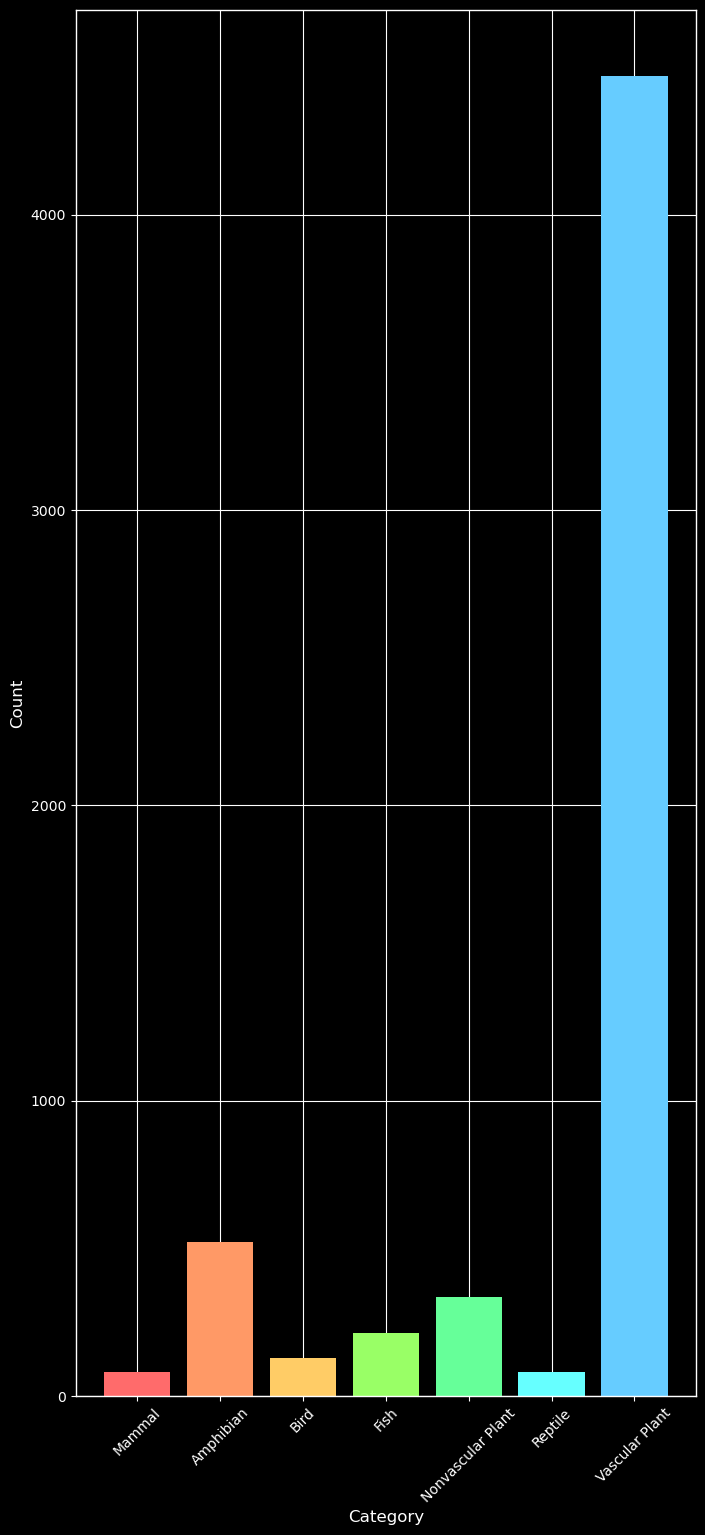

In [6]:

category_grouped = species.groupby('category')
category_grouped.category.value_counts()
categories = ['Mammal', 'Amphibian', 'Bird', 'Fish', 'Nonvascular Plant', 'Reptile', 'Vascular Plant']
counts = [80, 521, 127, 214, 333, 79, 4470]
hex_colors = ['#ff6b6b', '#ff9966', '#ffcc66', '#99ff66', '#66ff99', '#66ffff', '#66ccff']
plt.style.use('dark_background')
plt.figure(figsize=(8,18))
plt.bar(categories, counts, color= hex_colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.tick_params(axis='x', rotation=45)
plt.show()

#category_grouped.head(10)
#obs.head(10)
#mammal.scientific_name.value_counts()

Poniżej przedstawiony został diagram kołowy przedstawiający podział wśród populacji na gatunki zwierząt;Species Of Concern, Endangered, Threatened, In Recovery.Możemy zauważyć że najwięcej gatunków jest w Species of concern

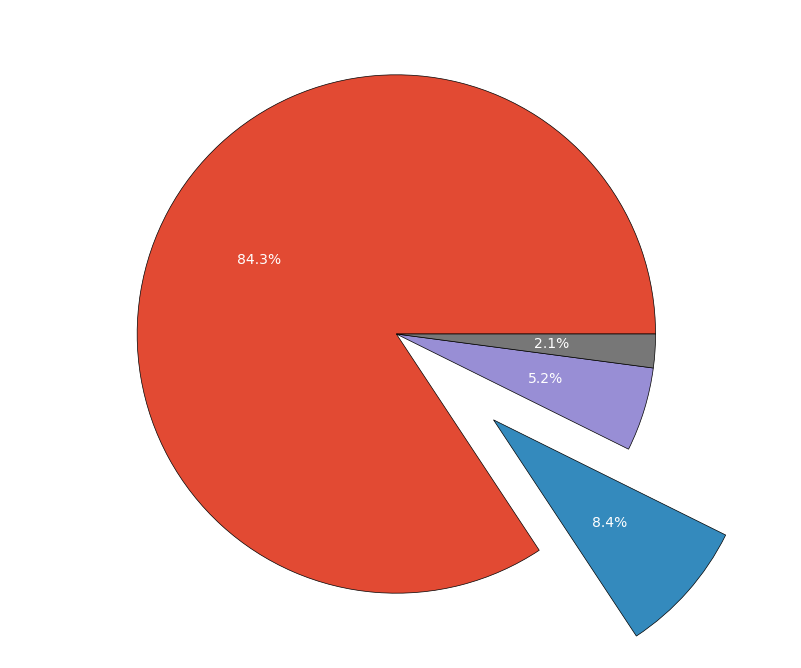

In [11]:
#ile zwierzat jest concern, endergaded itp
plt.style.use('ggplot')
species.head(5)
species.conservation_status.value_counts()
cons_stats = [161, 16, 10, 4]
labelss = ['Species Of Concern', 'Endangered', 'Threatened', 'In Recovery']
explode = [0, 0.5, 0, 0]
plt.figure(figsize=(12, 8))
plt.pie(cons_stats, labels=labelss, 
        autopct='%1.1f%%',
        wedgeprops = {'edgecolor': 'black'},
        explode=explode)
plt.rcParams.update({'font.size': 22})
plt.show()

Dzięki poniższej operacji dowiemy się ile obserwacji łącznie ma każdy park.

In [8]:
parks = ['Yellowstone National Park', 'Bryce National Park', 'Great Smoky Mountains National Park', 'Yosemite National Park']

park_obs_sums = {}

for park in parks:
    park_data = obs[obs['park_name'] == park]
    park_obs_sums[park] = park_data['observations'].sum()

print(park_obs_sums)

{'Yellowstone National Park': 1443562, 'Bryce National Park': 576025, 'Great Smoky Mountains National Park': 431820, 'Yosemite National Park': 863332}


Wykres ujawniam nam dominacje parku YellowStone na tej płaszczyźnie.

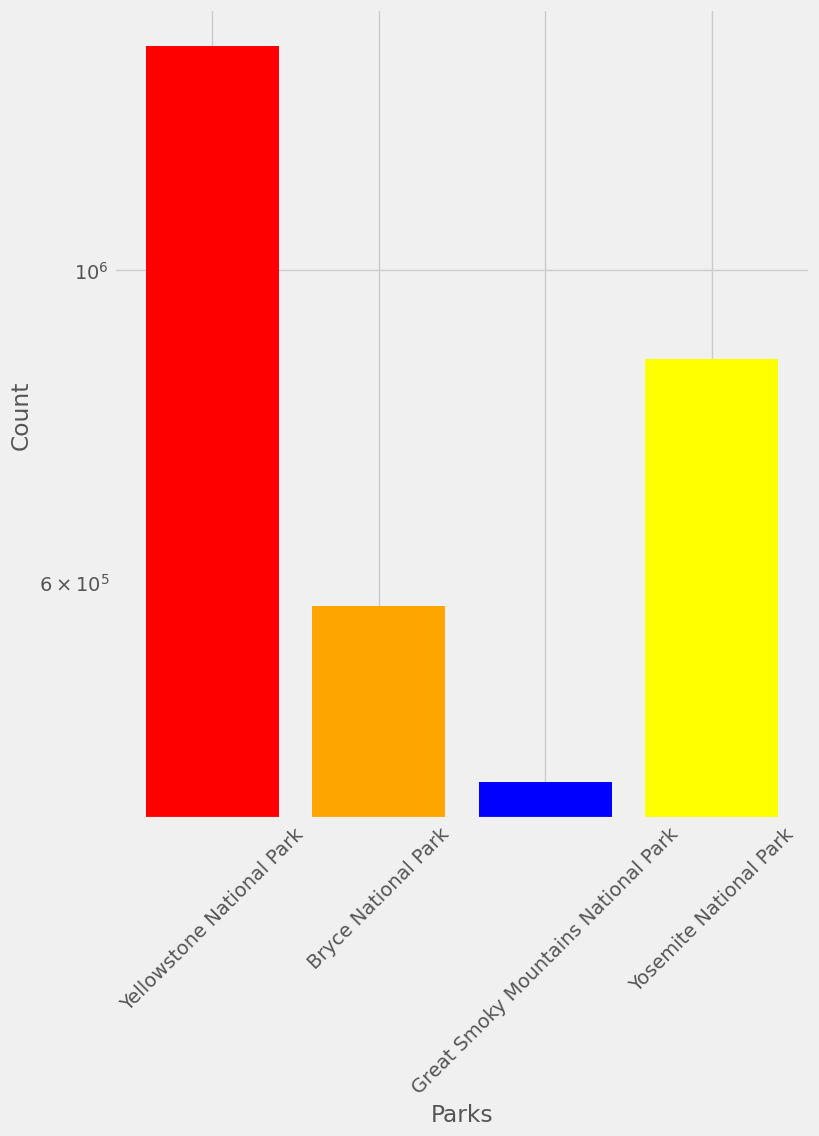

In [9]:
plt.style.use('fivethirtyeight')
parks = ['Yellowstone National Park', 'Bryce National Park', 'Great Smoky Mountains National Park', 'Yosemite National Park']
numbers = [1443562, 576025, 431820, 863332]
colors = ['red', 'orange', 'blue', 'yellow']
plt.figure(figsize=(8,10))   
plt.bar(parks, numbers, color=colors)
plt.xlabel('Parks')
plt.ylabel('Count')
plt.tick_params(axis='x', rotation=45)
plt.yscale('log')
plt.show()
